In [94]:
pwd

'C:\\Users\\Kriszta\\desktop\\datas'

In [95]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE


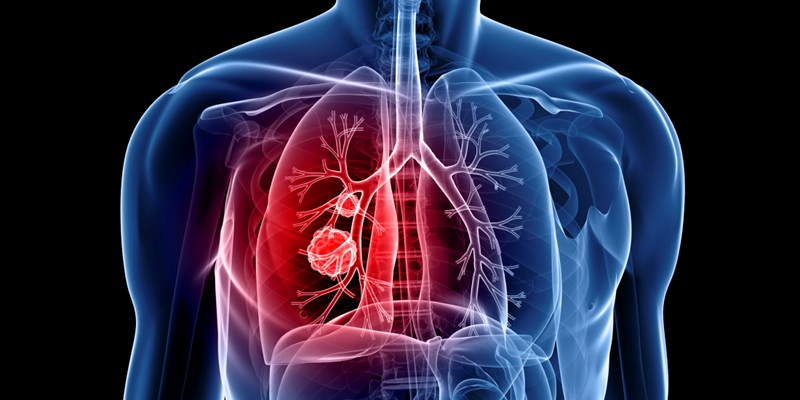

In [96]:
Image('lung_cancer.jpg')

In [97]:
df=pd.read_csv('survey lung cancer.csv' )

In [98]:
df  # no = 1, yes = 2

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


# Early warning signs of lung cancer
Most lung cancers don't cause symptoms until the disease has advanced, in part because the lungs have few nerve endings. When lung cancer does cause signs in its early stages, they may vary from person to person but commonly include:

    *A new cough that is persistent or worsens, or a change in an existing chronic cough
    *Cough that produces blood
    *Pain in the chest, back or shoulders that worsens during coughing, laughing or deep breathing
    *Shortness of breath that comes on suddenly and occurs during everyday activities
    *Unexplained weight loss
    *Feeling that you are tired or weak
    *Loss of appetite
    *Lung infections such as bronchitis or pneumonia that won't go away
    *Hoarseness or wheezing

Less common symptoms of lung cancer may include:

    *Swelling in the face or neck
    *Difficulty swallowing or pain while swallowing
    *Changes in the appearance of fingers, called finger clubbing

Although most of these symptoms are more likely to be caused by something other than lung cancer, it's important to see a doctor. Discovering lung cancer early may mean more treatment options are available. 

In [99]:
# calculate the percentage of observations belonging to class 1
df['LUNG_CANCER'].value_counts(normalize=True)*100

YES    87.378641
NO     12.621359
Name: LUNG_CANCER, dtype: float64

We have an imbalance dataset as 87,38% of the people who filled the survey have lung cancer and only 12,62% have no cancer. 

 Define Variable of interest, and split our dataset

In [100]:
# our target is LUNG_CANCER, as they are string, will change the yes and no to number 
df = df.replace(to_replace = ['YES','NO'],value = ['2','1'])

In [101]:
df["LUNG_CANCER"] = df["LUNG_CANCER"].astype(int)  # change to integer 

In [102]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [103]:
y=df['LUNG_CANCER']
X= df.drop(['LUNG_CANCER'],axis=1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((231, 15), (78, 15), (231,), (78,))

Exploratory data analysis

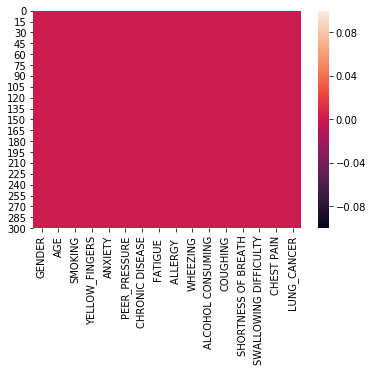

In [105]:
sns.heatmap(df.isna())  # nice clean dataset, no missing values

In [106]:
df_train = X_train.join(y_train)

In [107]:
df_train.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,62.653680,1.567100,1.558442,1.497835,1.515152,1.519481,1.666667,1.558442,1.597403,1.554113,1.597403,1.649351,1.445887,1.545455,1.865801
std,8.595827,0.496553,0.497651,0.501081,0.500856,0.500705,0.472428,0.497651,0.491486,0.498143,0.491486,0.478210,0.498143,0.499011,0.341606
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [108]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 212 to 265
Data columns (total 16 columns):
GENDER                   231 non-null object
AGE                      231 non-null int64
SMOKING                  231 non-null int64
YELLOW_FINGERS           231 non-null int64
ANXIETY                  231 non-null int64
PEER_PRESSURE            231 non-null int64
CHRONIC DISEASE          231 non-null int64
FATIGUE                  231 non-null int64
ALLERGY                  231 non-null int64
WHEEZING                 231 non-null int64
ALCOHOL CONSUMING        231 non-null int64
COUGHING                 231 non-null int64
SHORTNESS OF BREATH      231 non-null int64
SWALLOWING DIFFICULTY    231 non-null int64
CHEST PAIN               231 non-null int64
LUNG_CANCER              231 non-null int32
dtypes: int32(1), int64(14), object(1)
memory usage: 39.8+ KB


In [109]:
cols = list(df_train)
cols = [cols[-1]] + cols[:-1]
df_train = df_train[cols]    # want the target be the first

In [110]:
df_train.head()

,LUNG_CANCER,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
212,2,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2
76,2,F,76,1,2,2,2,2,2,2,2,1,2,2,2,2
281,1,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2
152,2,F,74,1,2,2,2,2,2,1,2,2,1,1,1,1
162,2,F,73,2,1,1,2,1,2,2,2,2,2,1,2,2


(15.0, 0.0)

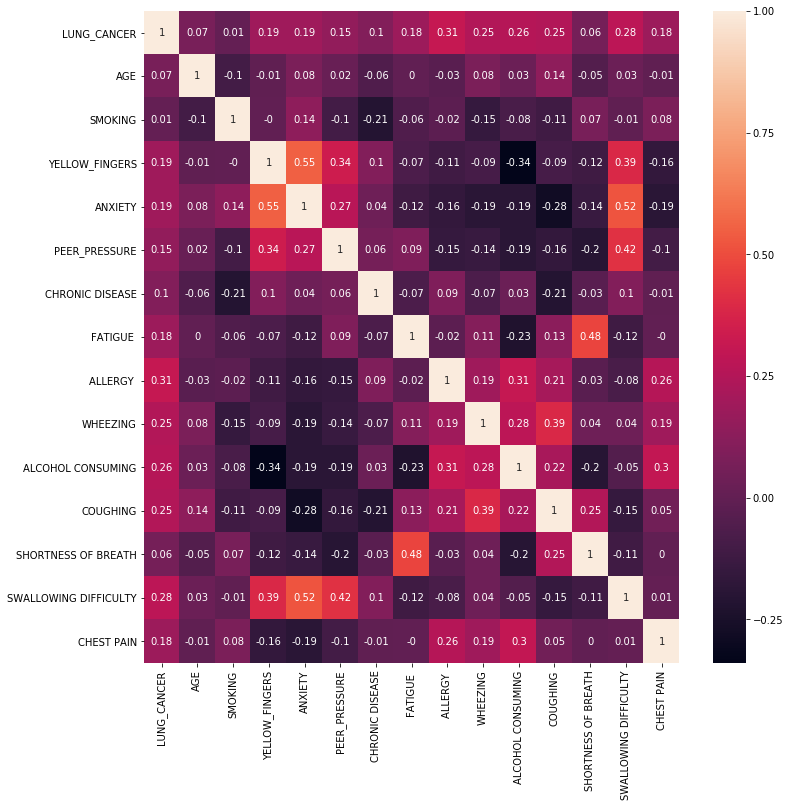

In [111]:
plt.rcParams['figure.figsize'] = (12,12)
corr_mat=df_train.corr().round(2)
ax=sns.heatmap(data=corr_mat, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

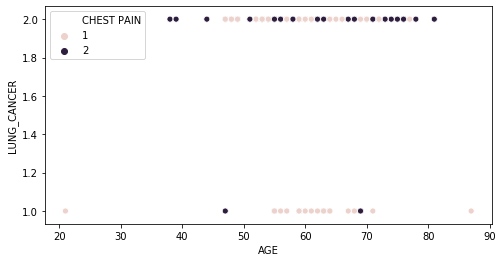

In [112]:
plt.rcParams['figure.figsize'] = (8,4)
sns.scatterplot(x='AGE', y='LUNG_CANCER', data= df_train, hue='CHEST PAIN', legend="full")

In [113]:
df_train.groupby(['CHEST PAIN'])['LUNG_CANCER'].value_counts(normalize=True)*100

CHEST PAIN  LUNG_CANCER
1           2              80.000000
            1              20.000000
2           2              92.063492
            1               7.936508
Name: LUNG_CANCER, dtype: float64

7,94% of the people who have chest pain symptom have lung cancer, on the other hand, 20% of the people who have no chest pain have lung cancer.

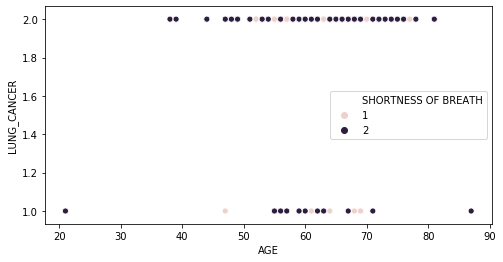

In [114]:
sns.scatterplot(x='AGE', y='LUNG_CANCER', data= df_train, hue='SHORTNESS OF BREATH',legend="full")

In [115]:
df_train.groupby(['SHORTNESS OF BREATH'])['LUNG_CANCER'].value_counts(normalize=True)*100

SHORTNESS OF BREATH  LUNG_CANCER
1                    2              83.950617
                     1              16.049383
2                    2              88.000000
                     1              12.000000
Name: LUNG_CANCER, dtype: float64

12% of the people who have shortness of breath symptom have lung cancer, but 16% of the people who have no such symptom have lung cancer

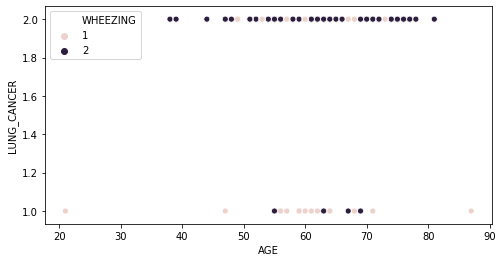

In [116]:
sns.scatterplot(x='AGE', y='LUNG_CANCER', data= df_train, hue='WHEEZING', legend="full")

In [117]:
df_train.groupby(['WHEEZING'])['LUNG_CANCER'].value_counts(normalize=True)*100

WHEEZING  LUNG_CANCER
1         2              76.344086
          1              23.655914
2         2              93.478261
          1               6.521739
Name: LUNG_CANCER, dtype: float64

Only 6,5% of the people who have wheezing symptom have lung cancer, meanwhile, 23,6% have lung cancer who have no wheezing symptom

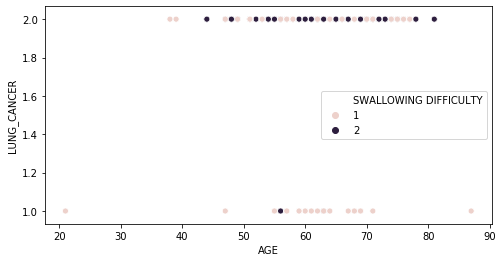

In [118]:
sns.scatterplot(x='AGE', y='LUNG_CANCER', data= df_train, hue='SWALLOWING DIFFICULTY', legend="full")

In [119]:
df_train.groupby(['SWALLOWING DIFFICULTY'])['LUNG_CANCER'].value_counts(normalize=True)*100

SWALLOWING DIFFICULTY  LUNG_CANCER
1                      2              78.125000
                       1              21.875000
2                      2              97.087379
                       1               2.912621
Name: LUNG_CANCER, dtype: float64

97% of the people who have swallowing difficulty have lung cancer and 78% of the people who have no swallowing difficulty have lung cancer,too

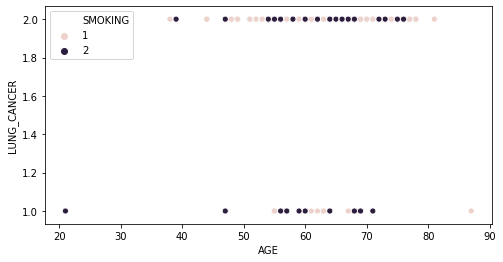

In [120]:
sns.scatterplot(x='AGE', y='LUNG_CANCER', data= df_train, hue='SMOKING', legend="full")

In [121]:
df_train.groupby(['SMOKING'])['LUNG_CANCER'].value_counts(normalize=True)*100

SMOKING  LUNG_CANCER
1        2              86.000000
         1              14.000000
2        2              87.022901
         1              12.977099
Name: LUNG_CANCER, dtype: float64

very similar results, only 1% difference between smokers and non smokers 

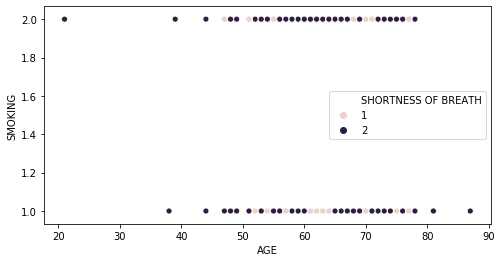

In [122]:
# Let´s see the conection between the shortness of breath and smoking.
sns.scatterplot(x='AGE', y='SMOKING', data= df_train, hue='SHORTNESS OF BREATH', legend="full")

In [123]:
df_train.groupby(['SMOKING'])['SHORTNESS OF BREATH'].value_counts(normalize=True)*100

SMOKING  SHORTNESS OF BREATH
1        2                      61.000000
         1                      39.000000
2        2                      67.938931
         1                      32.061069
Name: SHORTNESS OF BREATH, dtype: float64

67,9 % of the smokers have shortness of breath symptom.

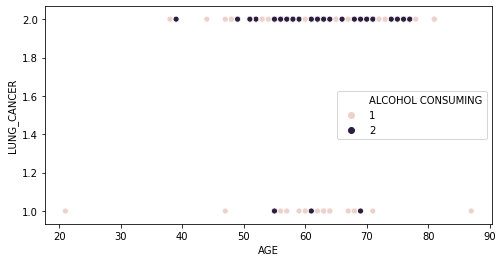

In [124]:
sns.scatterplot(x='AGE', y='LUNG_CANCER', data= df_train, hue='ALCOHOL CONSUMING', legend="full")

In [125]:
df_train.groupby(['ALCOHOL CONSUMING'])['LUNG_CANCER'].value_counts(normalize=True)*100

ALCOHOL CONSUMING  LUNG_CANCER
1                  2              76.699029
                   1              23.300971
2                  2              94.531250
                   1               5.468750
Name: LUNG_CANCER, dtype: float64

95% of the people who have alcohol consuming have lung cancer.

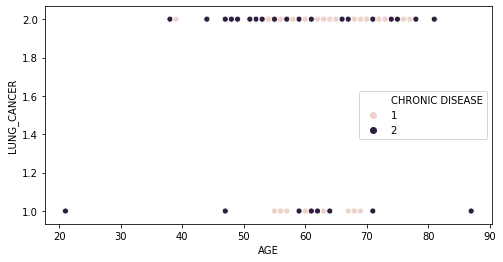

In [126]:
sns.scatterplot(x='AGE', y='LUNG_CANCER', data= df_train, hue='CHRONIC DISEASE',legend="full")

In [127]:
df_train.groupby(['CHRONIC DISEASE'])['LUNG_CANCER'].value_counts(normalize=True)*100

CHRONIC DISEASE  LUNG_CANCER
1                2              82.882883
                 1              17.117117
2                2              90.000000
                 1              10.000000
Name: LUNG_CANCER, dtype: float64

In [128]:
df_train.groupby(['SMOKING','ALCOHOL CONSUMING'])['LUNG_CANCER'].value_counts(normalize=True)*100

SMOKING  ALCOHOL CONSUMING  LUNG_CANCER
1        1                  2              75.000000
                            1              25.000000
         2                  2              93.333333
                            1               6.666667
2        1                  2              77.777778
                            1              22.222222
         2                  2              95.588235
                            1               4.411765
Name: LUNG_CANCER, dtype: float64

In [129]:
df_train.groupby(['SMOKING','ALCOHOL CONSUMING','CHRONIC DISEASE'])['LUNG_CANCER'].value_counts(normalize=True)*100

SMOKING  ALCOHOL CONSUMING  CHRONIC DISEASE  LUNG_CANCER
1        1                  1                2               68.421053
                                             1               31.578947
                            2                2               80.952381
                                             1               19.047619
         2                  1                2               94.117647
                                             1                5.882353
                            2                2               93.023256
                                             1                6.976744
2        1                  1                2               71.875000
                                             1               28.125000
                            2                2               83.870968
                                             1               16.129032
         2                  1                2               93.023256
                    

As we can see above 96% of the people who is smoking and also alcohol-consuming have lung cancer. With this too bad habits in time comes the chronic disease in most of the case. In our dataset, 100% of the people who smoke, drink alcohol and have a chronic disease has lung cancer.

In [130]:
df_train.groupby(['SWALLOWING DIFFICULTY','WHEEZING','CHEST PAIN'])['LUNG_CANCER'].value_counts(normalize=True)*100

SWALLOWING DIFFICULTY  WHEEZING  CHEST PAIN  LUNG_CANCER
1                      1         1           2               52.941176
                                             1               47.058824
                                 2           2               80.000000
                                             1               20.000000
                       2         1           2               88.000000
                                             1               12.000000
                                 2           2               89.795918
                                             1               10.204082
2                      1         1           2               94.736842
                                             1                5.263158
                                 2           2               95.000000
                                             1                5.000000
                       2         1           2               96.296296
                    

We have above 3 early warning signs of lung cancer from our dataset and 100% of the people who have these 3 symptoms (swallowing difficulty, wheezing, chest pain) have lung cancer.

In [131]:
X.shape , y.shape

((309, 15), (309,))

In [132]:
df_train.columns

Index(['LUNG_CANCER', 'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [133]:
column_transformer = ColumnTransformer([  
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['GENDER']),
    ('do_nothing', 'passthrough',['SWALLOWING DIFFICULTY', 'CHEST PAIN','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH','SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING','AGE'])
])

In [134]:
column_transformer.fit(X_train)

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['GENDER']),
                                ('do_nothing', 'passthrough',
                                 ['SWALLOWING DIFFICULTY', 'CHEST PAIN',
                                  'ALCOHOL CONSUMING', 'COUGHING',
                                  'SHORTNESS OF BREATH', 'SMOKING',
                                  'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                                  'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ',
                                  'WHEEZING', 'AGE'])])

In [135]:
X_train_tr = column_transformer.transform(X_train)
X_train_tr.shape

(231, 16)

In [136]:
X_test=column_transformer.transform(X_test)

In [137]:
X_train_tr

array([[ 0.,  1.,  1., ...,  2.,  2., 58.],
       [ 1.,  0.,  2., ...,  2.,  2., 76.],
       [ 0.,  1.,  1., ...,  2.,  1., 55.],
       ...,
       [ 1.,  0.,  2., ...,  2.,  2., 48.],
       [ 1.,  0.,  1., ...,  2.,  1., 53.],
       [ 1.,  0.,  2., ...,  2.,  1., 60.]])

In [138]:
def print_evaluations(ytrue, ypred, model):
    '''
    Prints the confusion matrix and some evaluation metrics for 
    a specified model.
    '''
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred, average="weighted"), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred,average="weighted"), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred,average="weighted"), 3)}')
    
    #print confusion matrix
    fig = plt.figure(figsize=(8, 8))
    cm = confusion_matrix(ytrue, ypred)
    print(cm)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='.0f', ax= ax)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['NO_LUNG_CANCER', 'LUNG_CANCER'])
    ax.yaxis.set_ticklabels(['NO_LUNG_CANCER', 'LUNG_CANCER'])

Build a simple baseline model

In [148]:
ypred_bl = [1] * X.shape[0]

How does model Baseline score:
The accuracy of the model is: 0.126
The precision of the model is: 0.016
The recall of the model is: 0.126
The f1-score of the model is: 0.028
[[ 39   0]
 [270   0]]


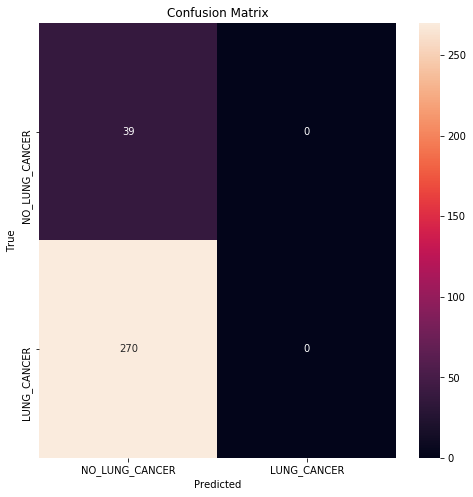

In [149]:
print_evaluations(y, ypred_bl, 'Baseline')

Compare it to a random forest classifier

In [150]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, max_depth=3
                            , random_state=10)

In [151]:
# Fit the model on the training data
rf.fit(X_train_tr, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [152]:
ypred_rf = rf.predict(X_test)
ypred_rf

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

How does model RandomForest score:
The accuracy of the model is: 0.885
The precision of the model is: 0.804
The recall of the model is: 0.885
The f1-score of the model is: 0.842
[[ 0  8]
 [ 1 69]]


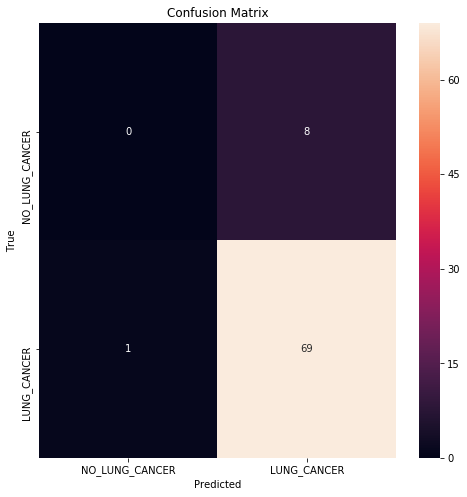

In [153]:
# Inspect the evaluators
print_evaluations(y_test, ypred_rf, 'RandomForest') 

# Use Undersampling

In [154]:
# Instantiate both resamplers

rus = RandomUnderSampler( sampling_strategy={1: 25})
nm = NearMiss(sampling_strategy={1: 25})

In [155]:
# Resample according to both resamplers
X_rus, y_rus = rus.fit_resample(X_train_tr, y_train)
X_nm, y_nm = nm.fit_resample(X_train_tr, y_train)

In [156]:
X_rus.shape, y_rus.shape

((225, 16), (225,))

random undersampling model

How does model RandomUndersampling score:
The accuracy of the model is: 0.897
The precision of the model is: 0.805
The recall of the model is: 0.897
The f1-score of the model is: 0.849
[[ 0  8]
 [ 0 70]]


C:\Users\Kriszta\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


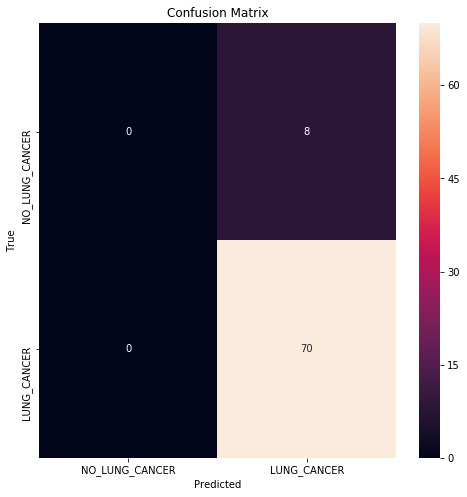

In [158]:
# Fit the random undersampling model, 
# make predictions and inspect evaluations
rf.fit(X_rus, y_rus)
ypred_rus = rf.predict(X_test)
print_evaluations(y_test, ypred_rus, 'RandomUndersampling')

Near Miss model

How does model NearMiss score:
The accuracy of the model is: 0.885
The precision of the model is: 0.804
The recall of the model is: 0.885
The f1-score of the model is: 0.842
[[ 0  8]
 [ 1 69]]


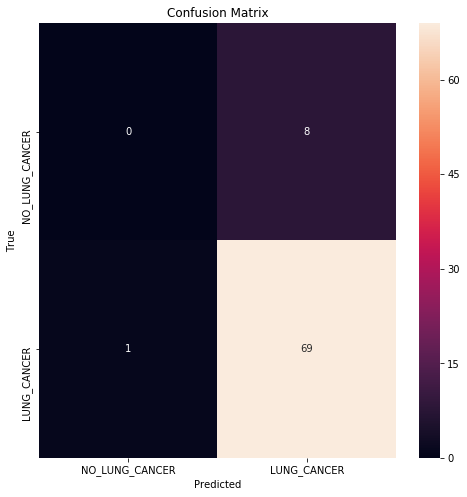

In [73]:
# Fit the Near Miss, 
# make predictions and inspect evaluations
rf.fit(X_nm, y_nm)
ypred_nm = rf.predict(X_test)
print_evaluations(y_test, ypred_nm, 'NearMiss')

# Use Oversampling

RandomOverSampler Model

In [74]:
ros = RandomOverSampler(random_state=10, sampling_strategy={2: 200})
X_ros, y_ros = ros.fit_resample(X_train_tr, y_train)

In [75]:
np.unique(y_ros, return_counts=True)

(array([1, 2]), array([ 31, 200], dtype=int64))

How does model RandomOversampling score:
The accuracy of the model is: 0.885
The precision of the model is: 0.804
The recall of the model is: 0.885
The f1-score of the model is: 0.842
[[ 0  8]
 [ 1 69]]


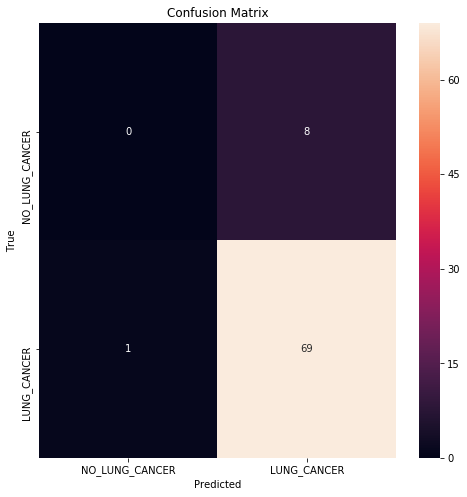

In [76]:
# Fit the RandomOverSampling, 
# make predictions and inspect evaluations
rf.fit(X_ros, y_ros)
ypred_ros = rf.predict(X_test)
print_evaluations(y_test, ypred_ros, 'RandomOversampling')

SMOTE

How does model SMOTE score:
The accuracy of the model is: 0.885
The precision of the model is: 0.804
The recall of the model is: 0.885
The f1-score of the model is: 0.842
[[ 0  8]
 [ 1 69]]


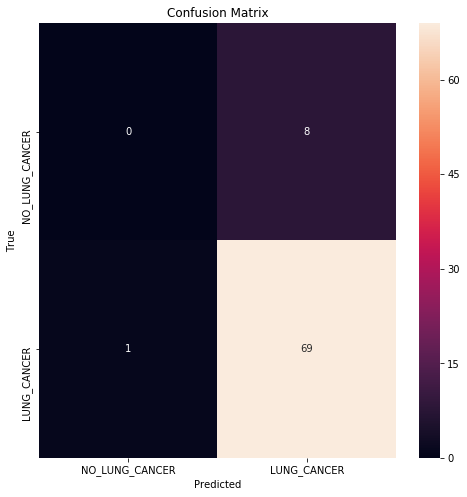

In [77]:
# Fit and run SMOTE
sm = SMOTE(sampling_strategy={2: 200})
X_sm, y_sm = sm.fit_resample(X_train_tr, y_train)

rf.fit(X_sm, y_sm)
ypred_sm = rf.predict(X_test)
print_evaluations(y_test, ypred_sm, 'SMOTE')

Rrandom undersampling model give us the best result. 4 models gave the same results.
The dataset is small, would need more data to build a better model.


### Please keep in mind, before you make any conclusion, this dataset is very small.